In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.colors import LogNorm

# sns.set_theme(palette='colorblind')

In [2]:
spe_perm = np.loadtxt("./spe_perm.dat", dtype=float).reshape(
    3, 85, 220, 60
)  # Milli Darcy
spe_perm = spe_perm[0]  # Taking only the 0th component of the tensor
spe_perm *= 9.869233e-16  # To SI
spe_phi = np.loadtxt("./spe_phi.dat", dtype=float).reshape(85, 220, 60)

# Small model

In [3]:
perm_small = spe_perm[0, :120]
phi_small = spe_phi[0, :120]
print(perm_small.shape)
print(phi_small.shape)

np.save("spe10_l0_120_perm.npy", perm_small)
np.save("spe10_l0_120_phi.npy", phi_small)

(120, 60)
(120, 60)


In [4]:
perm_small.max()

3.967836304553e-12

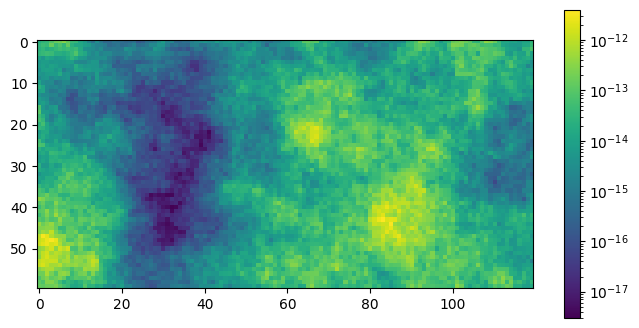

In [5]:
plt.figure(figsize=(8, 4))

plt.imshow(perm_small.T, norm=LogNorm())
plt.colorbar()

In [6]:
perm_small.min() * 1e6

2.9933383689000003e-12

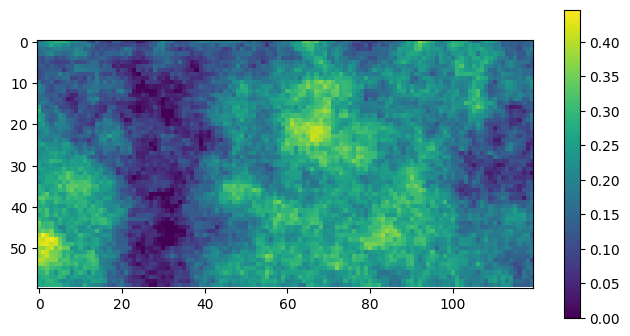

In [7]:
plt.figure(figsize=(8, 4))

plt.imshow(phi_small.T)
plt.colorbar()

# Medium model

In [8]:
perm_med = spe_perm[0]
phi_med = spe_phi[0]
print(perm_small.shape)
print(phi_small.shape)
np.save("spe10_l0_220_perm.npy", perm_med)
np.save("spe10_l0_220_phi.npy", phi_med)

(120, 60)
(120, 60)


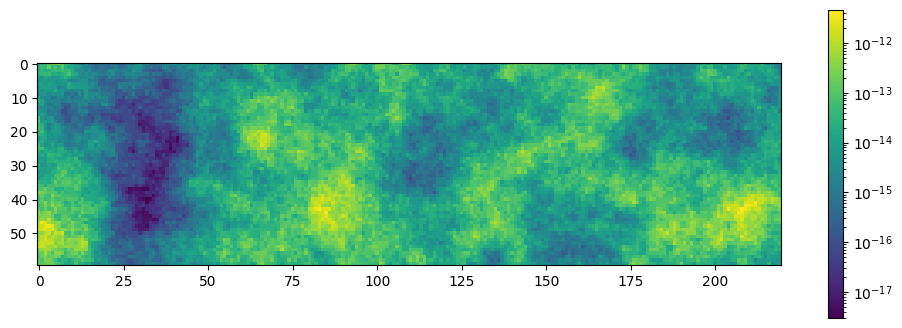

In [9]:
plt.figure(figsize=(12, 4))

plt.imshow(perm_med.T, norm=LogNorm())
plt.colorbar()

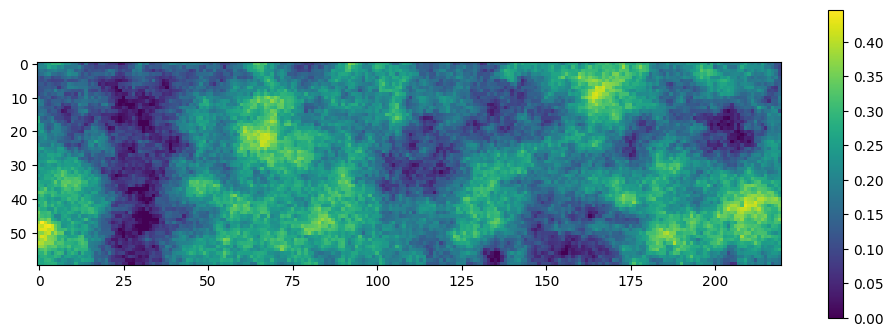

In [10]:
plt.figure(figsize=(12, 4))

plt.imshow(phi_med.T)
plt.colorbar()

## Well locations

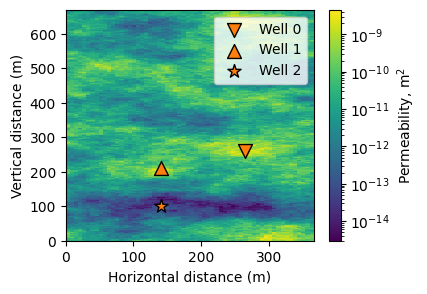

In [11]:
perm_med_t = perm_med.T * 1000 # We multiply permeability by 1000 in the experiments
cell_size_x = 6.096  # m
cell_size_y = 3.048  # m
x = np.arange(perm_med_t.shape[0]) * cell_size_x + cell_size_x / 2
y = np.arange(perm_med_t.shape[1]) * cell_size_y + cell_size_y / 2

wells = [265, 260], [140, 210], [140.0, 100.0]
markers = 'v', '^', '*'

X, Y = np.meshgrid(x, y, indexing='ij')

plt.figure(figsize=(4, 3))
plt.pcolormesh(X, Y, perm_med_t, norm=LogNorm())
clb = plt.colorbar()
clb.ax.set_ylabel('Permeability, m$^2$')

for i, well_loc in enumerate(wells):
    x, y = well_loc
    plt.scatter(x, y, label=f'Well {i}', marker=markers[i], color='black', s=100, linewidths=1, facecolors='C1')
plt.xlabel('Horizontal distance (m)')
plt.ylabel('Vertical distance (m)')
plt.legend()
plt.savefig(f'well_location.pdf', bbox_inches="tight")
plt.show()

# Large model

In [12]:
def mirrored(data):
    tmp = np.concatenate([data, data[::-1]], axis=0)
    return np.concatenate([tmp, tmp[:, ::-1]], axis=1)


perm_large = mirrored(perm_med)
phi_large = mirrored(phi_med)
np.save("spe10_l0_mirrored_perm.npy", perm_large)
np.save("spe10_l0_mirrored_phi.npy", phi_large)
print(perm_large.shape)
print(phi_large.shape)

(440, 120)
(440, 120)


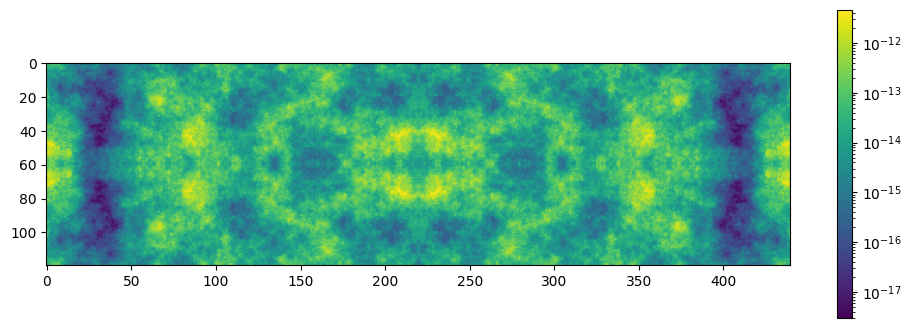

In [13]:
plt.figure(figsize=(12, 4))

plt.imshow(perm_large.T, norm=LogNorm())
plt.colorbar()
plt.show()

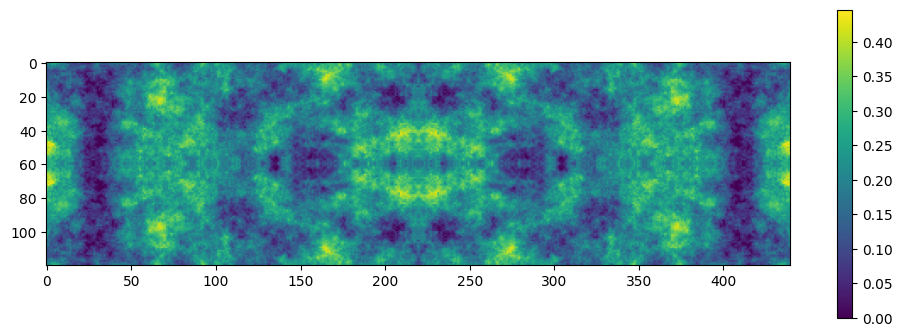

In [14]:
plt.figure(figsize=(12, 4))

plt.imshow(phi_large.T)
plt.colorbar()